Step 1: Import Libraries

In [5]:
import numpy as np
import pandas as pd

Step 2: Create the Dataset

In [6]:
data = {
    "Attendance": [85, 90, 88, 92, 80],
    "Internal": [78, 82, 79, 85, 75],
    "Assignment": [80, 85, 78, 88, 72],
    "EndSem": [75, 80, 77, 82, 70]
}

df = pd.DataFrame(data, index=["S1", "S2", "S3", "S4", "S5"])
print(df)

    Attendance  Internal  Assignment  EndSem
S1          85        78          80      75
S2          90        82          85      80
S3          88        79          78      77
S4          92        85          88      82
S5          80        75          72      70


Step 3: Mean Centering the Data

In [7]:
X = df.values
mean = np.mean(X, axis=0)
X_centered = X - mean

print("Mean values:\n", mean)
print("Mean-centered data:\n", X_centered)

Mean values:
 [87.  79.8 80.6 76.8]
Mean-centered data:
 [[-2.  -1.8 -0.6 -1.8]
 [ 3.   2.2  4.4  3.2]
 [ 1.  -0.8 -2.6  0.2]
 [ 5.   5.2  7.4  5.2]
 [-7.  -4.8 -8.6 -6.8]]


Step 4: Compute Covariance Matrix using X'T X

In [8]:
n = X_centered.shape[0]
cov_matrix = (X_centered.T @ X_centered) / (n - 1)

print("Covariance Matrix:\n", cov_matrix)


Covariance Matrix:
 [[22.   17.25 27.25 21.75]
 [17.25 14.7  23.15 17.45]
 [27.25 23.15 38.8  27.9 ]
 [21.75 17.45 27.9  21.7 ]]


Step 5: Compute Eigenvalues and Eigenvectors

In [9]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)


Eigenvalues:
 [9.45268771e+01 2.22164347e+00 5.64065085e-03 4.45838772e-01]
Eigenvectors:
 [[ 0.4725454   0.62452879  0.5772533   0.23117801]
 [ 0.38925919 -0.0311983   0.08230656 -0.91691307]
 [ 0.63119284 -0.70335897  0.12294418  0.30292984]
 [ 0.47620765  0.33804826 -0.80304981  0.11857766]]


Step 6: Select the First Principal Component (PC1)

In [10]:
idx = np.argmax(eigenvalues)
pc1 = eigenvectors[:, idx]

# Normalize
pc1 = pc1 / np.linalg.norm(pc1)

print("Principal Component 1 (Eigenvector):\n", pc1)


Principal Component 1 (Eigenvector):
 [0.4725454  0.38925919 0.63119284 0.47620765]


Step 7: Compute PC1 Scores (Projection)

In [11]:
pc1_scores = X_centered @ pc1

df["PC1_Score"] = pc1_scores
print(df)


    Attendance  Internal  Assignment  EndSem  PC1_Score
S1          85        78          80      75  -2.881647
S2          90        82          85      80   6.575119
S3          88        79          78      77  -1.384722
S4          92        85          88      82  11.533982
S5          80        75          72      70 -13.842732


Step 8: Variance Explained

In [12]:
explained_variance = eigenvalues / np.sum(eigenvalues)
print("Variance explained by PC1:", explained_variance[idx])

Variance explained by PC1: 0.9724987357056853


✔️ PC1 explains ~97% variance, so 1 component is enough.

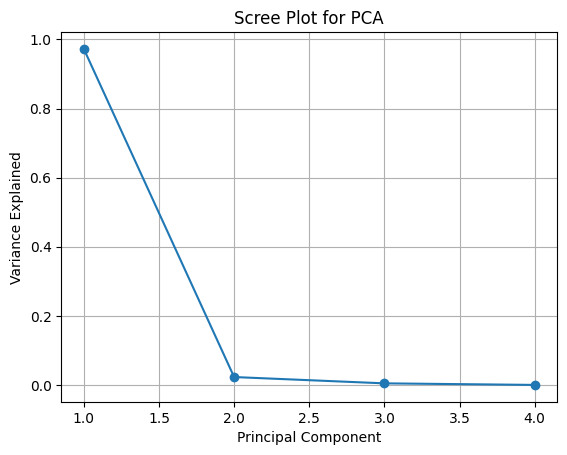

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Sort eigenvalues in descending order
eigenvalues_sorted = np.sort(eigenvalues)[::-1]

# Compute variance ratio
variance_ratio = eigenvalues_sorted / np.sum(eigenvalues_sorted)

# Scree plot
plt.figure()
plt.plot(range(1, len(variance_ratio) + 1), variance_ratio, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("Scree Plot for PCA")
plt.grid(True)
plt.show()
